In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [120]:
float(" 12")

12.0

In [145]:
file = open("./runs.txt")
cols = ["date"]
runs = []
run = []
for line in file:
    if line == "\n" or line == "":
        continue
    if line[0] == '#':
        if run != []:
            runs.append(run.copy())
            run = []
    else:
        if '=' in line:
            value = line.split("= ")[1][:-1]
            if value[0] == '[':
                if value[1] != ']':
                    value = [float(val) for val in value[1:-1].split(",")]
                else:
                    value = []
            run.append(value)
        else:
            run.append(line)
    lines.append(line)
    if line[0] != '#' and line[0] != 'O':
        col = line.split("=")[0].strip()
        if col != '' and not col.lower() in cols:
            cols.append(col.lower())

In [146]:
cols

['date',
 'num_channels',
 'pixel_depth',
 'num_labels',
 'training_size',
 'seed',
 'eval_batch_size',
 'batch_size',
 'num_epochs',
 'rotate_images',
 'restore_model',
 'train_predictions',
 'test_predictions',
 'enable_recording',
 'recording_step',
 'learning_rate',
 'last epoch',
 'validation f1 per epoch',
 'training f1 per epoch',
 'loss per recording step',
 'validation f1 score',
 'test f1 score',
 'conv_arch',
 'img_total_size',
 'validation_train_perc',
 'validation_val_perc',
 'validation_test_perc']

In [148]:
runs_df = pd.DataFrame(columns=cols)

In [149]:
for i, run in enumerate(runs):
    runs_df.loc[i] = run

In [154]:
runs_df.head()

,date,num_channels,pixel_depth,num_labels,training_size,seed,eval_batch_size,batch_size,num_epochs,rotate_images,...,validation f1 per epoch,training f1 per epoch,loss per recording step,validation f1 score,test f1 score,conv_arch,img_total_size,validation_train_perc,validation_val_perc,validation_test_perc
0,On Wed Dec 14 21:06:23 2016:\n,3,255,2,100,43212,64,64,100,False,...,"[0.7463821892393321, 0.7376169033598892, 0.768...","[0.884569209039548, 0.8924908580661621, 0.8867...","[2.5466218, 0.81505954, 0.51408231, 0.44782656...",0.7878292832346333,0.7969258054980787,"[1.0, 1.0]",16,0.6,0.3,0.1
1,On Wed Dec 14 21:08:44 2016:\n,3,255,2,100,43212,64,64,100,False,...,"[0.689499919601222, 0.7375886524822696, 0.7262...","[0.8564201120254932, 0.8599923423341295, 0.880...","[252.26292, 0.72619927, 0.64603227, 0.56431806...",0.7765546543066821,0.7778384279475982,"[2.0, 2.0, 4.0, 4.0]",16,0.6,0.3,0.1
2,On Wed Dec 14 21:14:02 2016:\n,3,255,2,100,43212,64,128,100,False,...,"[0.6816555157927494, 0.7092851559107097, 0.696...","[0.8519642338358243, 0.8620386794564898, 0.867...","[210.52885, 0.74782699, 0.60304046, 0.58841032...",0.7567831348819052,0.7734682405845981,"[2.0, 2.0, 4.0, 4.0]",16,0.6,0.3,0.1
3,On Wed Dec 14 21:41:33 2016:\n,3,255,2,100,43212,64,128,100,False,...,"[0.6772526971584865, 0.6829342455340175, 0.694...","[0.8528733804943964, 0.8558759019676404, 0.864...","[3284.1953, 2.4378939, 2.2762141, 2.2278454, 2...",0.8223183034795141,0.8495680667262436,"[2.0, 2.0, 4.0, 4.0]",48,0.6,0.3,0.1
4,On Wed Dec 14 22:19:03 2016:\n,3,255,2,100,43212,64,64,100,False,...,[],[],[],0.6666666666666666,0.6666666666666666,"[2.0, 4.0, 4.0]",48,0.6,0.3,0.1


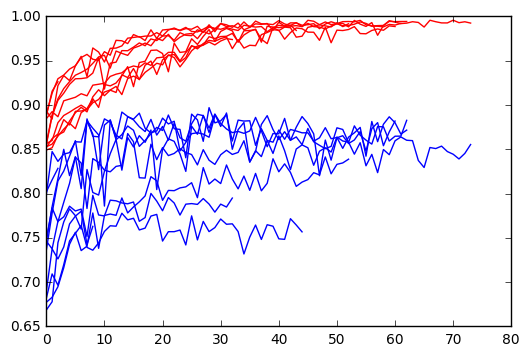

In [153]:
df = runs_df[["validation f1 per epoch", "training f1 per epoch"]]
for a in df.values:
    plt.plot(a[0], "b")
    plt.plot(a[1], "r")
plt.show()